<a href="https://colab.research.google.com/github/yoohyunseok/Machine-Learnig-Deep-Learning/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


In [5]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [26]:
train_input = train_input.reshape(-1,1) #2차원 배열로 변환
test_input = test_input.reshape(-1,1)
print(train_input.shape)
print(test_input.shape)

(42, 1)
(14, 1)


In [10]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors = 3) #k 값 3으로 지정
knr.fit(train_input, train_target) #훈련

KNeighborsRegressor(n_neighbors=3)

In [12]:
print(knr.predict([[50]])) #길이가 50cm인 농어 무게 예측
#but 실제는 1.5 kg...예측이랑 실제랑 차이가 많이 나는 상황

[1033.33333333]


**상황 파악을 위해 산점도 그리기**

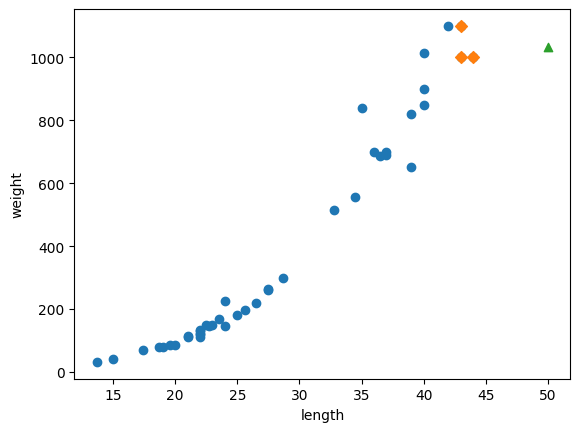

In [13]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)

plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

plt.scatter(50, 1033, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

**k-최근접 이웃 회귀의 문제점**

In [18]:
print(np.mean(train_target[indexes])) #예측값과 일치
#새로운 샘플이 훈련 세트 값을 벗어나면 예측이 많이 벗어난다... k-최근접 이웃 회귀의 문제점

1033.3333333333333


In [20]:
print(knr.predict([[100]])) #길이 100짜리 농어도 똑같이 1.033kg 예측

[1033.33333333]


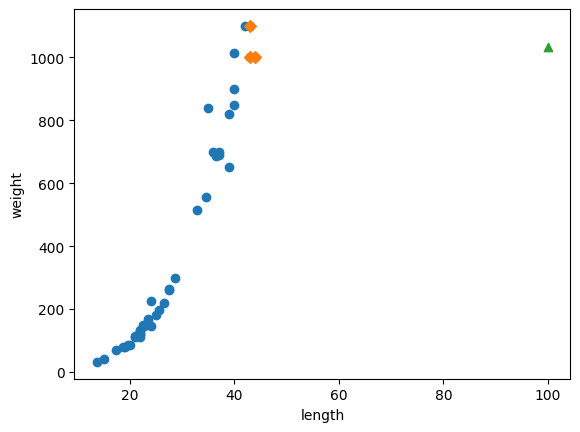

In [22]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)

plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

plt.scatter(100, 1033, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 선형 회귀(LinearRegression)


*   말 그대로 feature가 하나인 경우 어떤 직선을 학습하는 알고리즘
*   그 feature를 가장 잘 맞는 직선을 학습한다. 이 직선을 이용해서 예측을 함
*   직선의 방정식: y = ax + b
*   여기서 a와 b의 값을 학습하면서 구하는 것



In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() #선형 회귀 모델 객체 생성

lr.fit(train_input, train_target) # 모델 훈련

print(lr.predict([[50]])) #50cm 농어 무게 예측

[1241.83860323]


In [29]:
print(lr.coef_, lr.intercept_) #기울기(a)와 절편(b)
#기울기를 종종 coefficient(계수), weight(가중치)라고 부른다

[39.01714496] -709.0186449535477


**농어의 길이 1~50까지 직선으로 그어보기**

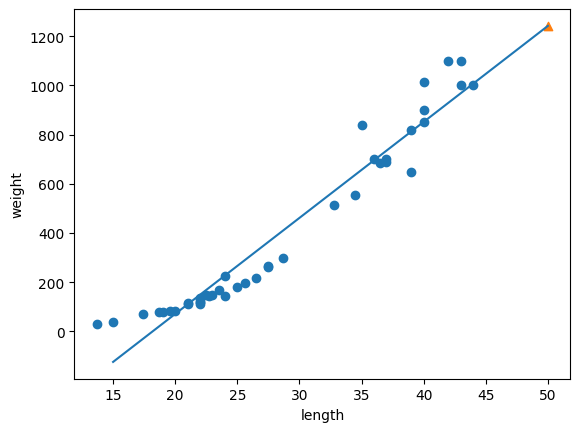

In [30]:
plt.scatter(train_input, train_target)

plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])# x = 15~50 까지 1차 방정식 그래프를 그린다.

plt.scatter(50, 1241.8, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [31]:
print(lr.score(train_input, train_target)) #훈련 세트 점수
print(lr.score(test_input, test_target)) #테스트 세트 점수

0.939846333997604
0.8247503123313558


**이것은 과대 적합일까? ㄴㄴ 훈련 세트의 점수도 높지 않아..오히려 전체적으로 점수가 낮은 과소 적합인듯**

1.   그래프의 왼쪽 아래를 보면 농어의 무게가 0g 아래로 내려가는 기현상이 발생
2.   왼쪽 아래로 쭉 뻗는 직선보단, 곡선이 더 feature과 맞는 것 같음
3.   때문에 feature에 더 잘 맞는 2차 함수(y=ax^2+bx+c)를 이용한 회귀를 진행할것임



In [32]:
train_poly = np.column_stack((train_input**2, train_input)) #2차 방정식의 그래프를 그릴려면 길이를 제곱한 값이 훈련 세트에 추가되어야한다.
#column_stack()을 이용해서 길이를 제곱한 값을 train_input 앞에 나란히 붙였다.
test_poly = np.column_stack((test_input**2, test_input)) #테스트 세트의 feature도 마찬가지

In [33]:
print(train_poly.shape, test_poly.shape) #feature 세트의 열이 2개로 늘어난 모습

(42, 2) (14, 2)


**타깃 값은 건들지 않으!!!!**

In [34]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [35]:
print(lr.coef_, lr.intercept_) # weight = 1.01 * length^2 - 21.6* length + 116.05

[  1.01433211 -21.55792498] 116.0502107827827


# 이러한 다항식(polynomial)을 이용한 선형 회귀를 다항 회귀(polynomial reression)라고 부른다.


*   그런데 2차 방정식이면 비선형이 아닌가요?
    - weight = 1.01 * length^2 - 21.6* length + 116.05
    - 이 2차 방정식의 length^2를 big length라는 변수로 치환하면...weight는 length와 big length의 선형 관계로 표현할 수 있게 됨

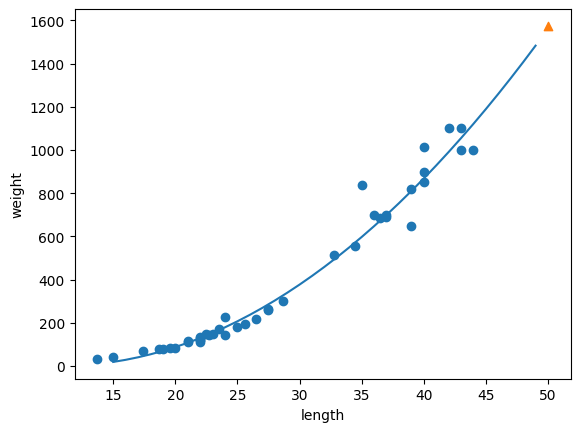

In [36]:
# 짦은 직선을 이어서 그리면 곡선 처럼 표현할 수 있다!!
point = np.arange(15, 50)#구간별(1 마다) 직선을 그리기 위해 15에서 49까지 정수 배열 만듦

plt.scatter(train_input, train_target)

plt.plot(point, 1.01*point**2 - 21.6*point + 116.05) #2차 함수 그래프

plt.scatter(50, 1574, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [37]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
#둘다 점수가 많이 높아짐 But 아직 약간 테스트 세트의 점수가 높다 => 약간의 과소 적합이 남아있음

0.9706807451768623
0.9775935108325122
